In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

In [6]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

In [7]:
df = df.rename(columns={'데이터':'백만'})
df['시점'].map(lambda x : x.split()[0])

0       2017.1/4
1       2017.2/4
2       2017.3/4
3       2017.4/4
4       2018.1/4
          ...   
2767    2021.2/4
2768    2021.3/4
2769    2021.4/4
2770    2022.1/4
2771    2022.2/4
Name: 시점, Length: 2772, dtype: object

In [8]:
df['연도'] = df['시점'].map(lambda x : int(x.split('.')[0]))
df['연도'].head()

0    2017
1    2017
2    2017
3    2017
4    2018
Name: 연도, dtype: int64

In [9]:
df['분기'] = df['시점'].map(lambda x : int(x.split('.')[1].split('/')[0]))
df['분기']

0       1
1       2
2       3
3       4
4       1
       ..
2767    2
2768    3
2769    4
2770    1
2771    2
Name: 분기, Length: 2772, dtype: int64

In [10]:
df

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [11]:
df1 = df.drop(df[['국가(대륙)별','상품군별','판매유형별','시점']], axis =1)

In [12]:
df1.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


In [13]:
# Q2 pivot_table
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [14]:
df2 = pd.pivot_table(df, index='국가(대륙)별', columns = '연도', values = '백만', aggfunc = sum)
df2.head()

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019


In [22]:
# Q3
df3 = df[df['연도'] == 2020]
df3

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,2020,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,2020,2
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,2020,3
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,2020,4
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,2020,1
...,...,...,...,...,...,...,...
2743,기타,생활용품 및 자동차용품,면세점 이외,2020.4/4,392,2020,4
2762,기타,기 타,면세점 이외,2020.1/4,939,2020,1
2763,기타,기 타,면세점 이외,2020.2/4,710,2020,2
2764,기타,기 타,면세점 이외,2020.3/4,826,2020,3


In [23]:
df4 = df3.groupby(['상품군별','국가(대륙)별']).백만.sum()
df4.unstack()

국가(대륙)별,기타,대양주,미국,아세안(ASEAN),유럽연합(EU),일본,중국,중남미,중동
상품군별,,,,,,,,,
가전·전자·통신기기,1716,3825,10103,12405,3040,404,1353,912,839
기 타,3345,923,38731,2620,3907,30509,22736,625,533
농축수산물,9,1,33,17,0,2,88,0,0
사무·문구,187,21,398,3279,25,1526,403,3,4
생활용품 및 자동차용품,1464,1198,11467,6432,2560,3911,7142,1361,1060
서 적,4563,367,9709,4192,514,1055,6659,188,139
소프트웨어,21,20,865,3,99,27,4,15,17
스포츠·레저용품,755,690,5862,7423,1297,646,3999,183,196
아동·유아용품,1646,484,4934,2698,1354,1353,5606,151,121


/var/folders/qr/6jsz3w4516vdwmpnz67ktft00000gn/T/ipykernel_54790/1803268793.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5 = df4[df["상품군별"].isin(["의류 및 패션 관련상품","화장품","음반·비디오·악기"])]


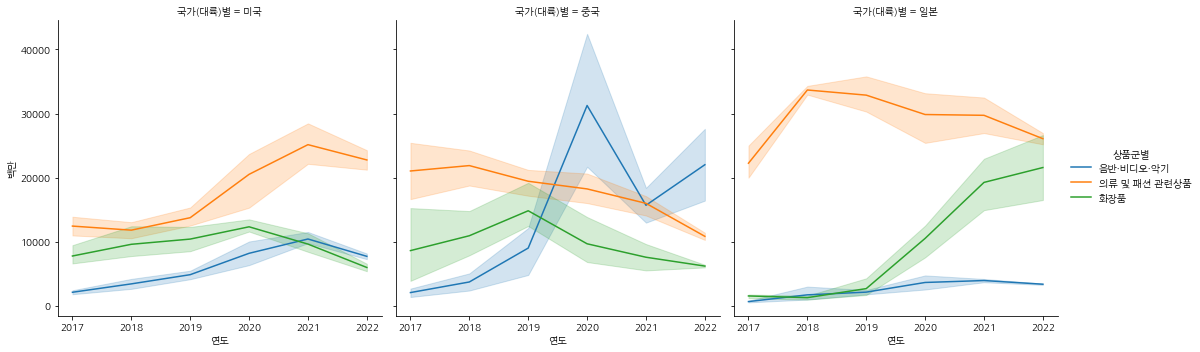

In [17]:
# Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.
df3 = df[~df["연도"].isin(["2022"])]
df4 = df3[df["국가(대륙)별"].isin(["미국","중국","일본"])]
df5 = df4[df["상품군별"].isin(["의류 및 패션 관련상품","화장품","음반·비디오·악기"])]
sns.relplot(data=df5, x="연도", y="백만", hue="상품군별", kind="line", col="국가(대륙)별")

In [56]:
# df_Q3 = df[(df["국가(대륙)별"].str.endswith('국')) & (df[df["국가(대륙)별"].str.endswith('본')])]
df7 = df[(df["국가(대륙)별"] == '중국') & (df["국가(대륙)별"] == '미국') & (df["국가(대륙)별"] == '일본')]
# df_Q3 = df.loc[df.index.str.contains("미국","중국",'일본')]
# df.loc[df.index.str.contains("미국","중국",'일본')]
df7

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기


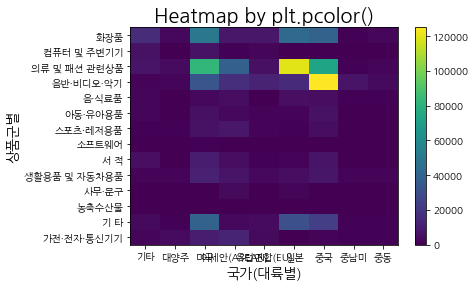

In [57]:
df2=df[(df["연도"]==2020)]
df2=df2.groupby(["상품군별", "국가(대륙)별"]).백만.sum()
df6=df2.unstack()
plt.pcolor(df6)
plt.xticks(np.arange(0.5, len(df6.columns), 1), df6.columns)
plt.yticks(np.arange(0.5, len(df6.index), 1), df6.index)
plt.title('Heatmap by plt.pcolor()', fontsize=20)
plt.xlabel("국가(대륙별)", fontsize=14)
plt.ylabel("상품군별", fontsize=14)
plt.colorbar()
plt.show()